## ***🚗Auto-mpg Prediction***

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [36]:
df = pd.read_csv(r"C:\Users\Yuvraj Bhavsar\OneDrive\Desktop\Class\auto-mpg.csv")

In [37]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [38]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


## 🚗 What is MPG?

**MPG** stands for **Miles Per Gallon**.

It measures a vehicle’s **fuel efficiency** —  
👉 how many **miles a car can travel using 1 gallon of fuel**.


In [39]:
df.shape

(398, 9)

## Auto MPG Dataset Columns

- **mpg**: Miles per gallon, the fuel efficiency of the car (target variable).  
- **cylinders**: Number of cylinders in the car's engine, affecting power and fuel consumption.  
- **displacement**: Engine size (in cubic inches), indicating engine capacity.  
- **horsepower**: Engine power, showing how strong and fast the car is.  
- **weight**: Car weight (in pounds), heavier cars usually consume more fuel.  
- **acceleration**: Time (in seconds) to accelerate from 0 to 60 mph, indicating car performance.  
- **model year**: Manufacturing year of the car, can capture technology improvements over time.  
- **origin**: Origin of the car (1=USA, 2=Europe, 3=Japan), can impact design and efficiency.


In [40]:
df["cylinders"].value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

In [41]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Cylinders Distribution'}, xlabel='cylinders'>

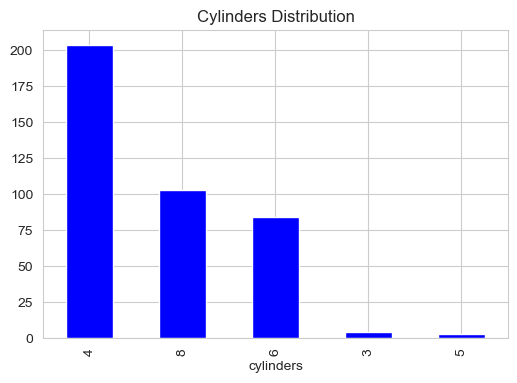

In [42]:
df["cylinders"].value_counts().plot(kind="bar", color = "blue", figsize=(6, 4), title="Cylinders Distribution")

In [43]:
df.drop("car name", axis=1, inplace=True)

In [44]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [46]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [47]:
(df['horsepower'] == '?').sum()

6

In [48]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

In [49]:
(df['horsepower'] == '?').sum()

0

In [50]:
y = df["mpg"]

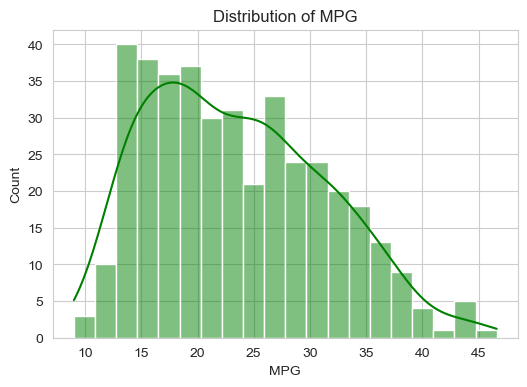

In [51]:
plt.figure(figsize=(6,4))
sns.histplot(y, bins=20, kde=True, color='green')
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Count')
plt.show()

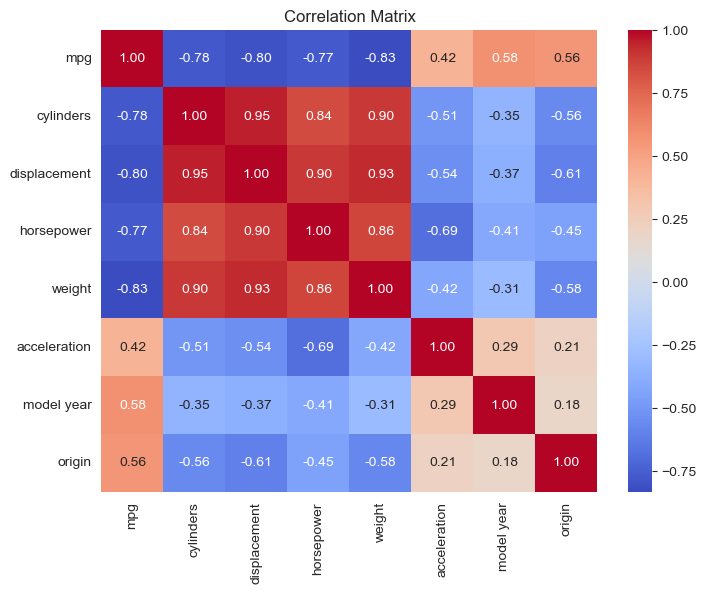

In [52]:
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## 🎯 Target Variable Analysis (MPG)

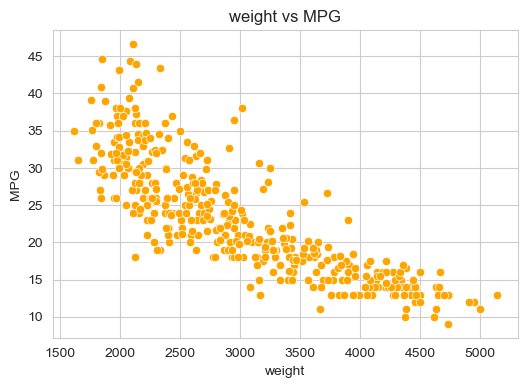

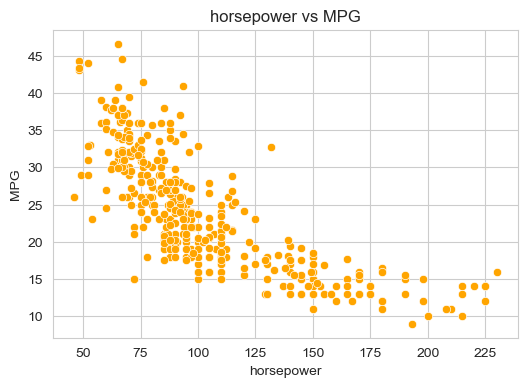

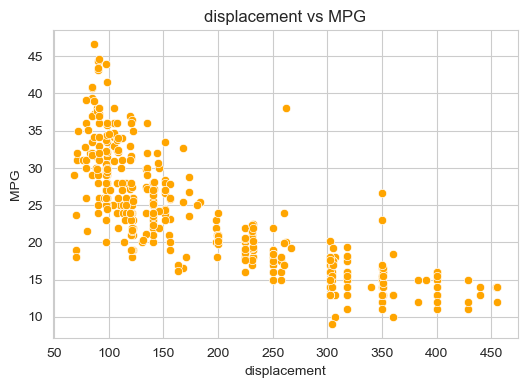

In [53]:
features = ['weight', 'horsepower', 'displacement']

for f in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[f], y=y,  color='orange')
    plt.title(f'{f} vs MPG')
    plt.xlabel(f)
    plt.ylabel('MPG')
    plt.show()

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler

### **Train test Split Data**

In [55]:
X=df.drop(columns=['mpg'])
y=df['mpg']

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(318, 7)
(80, 7)
(318,)
(80,)


### **Scaling using StandardScaler**

In [58]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)     

### **Linear Regression**

In [59]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
y_pred = linear_model.predict(X_test)

In [60]:
r2_score = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2_score}")

Mean Squared Error: 11.454792012258508
R-squared: 0.8194884044248836


### **Lasso Regression**

In [61]:
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred_lasso = lasso.predict(X_test)

In [62]:
from sklearn.metrics import r2_score, mean_squared_error

r2_value = r2_score(y_test, y_pred_lasso)
mse_value = mean_squared_error(y_test, y_pred_lasso)

print("R2:", r2_value)
print("MSE:", mse_value)

R2: 0.8045398705337488
MSE: 12.403386733088459


### **Ridge Regression**

In [63]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [64]:
r2 = r2_score(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)

print("R2:", r2)
print("MSE:", mse)

R2: 0.8191654471203458
MSE: 11.47528603504155
